# Bank marketing (Campaign) project


# Team member: Supin Hooda
# Batch code: LISUM25
# Submitted to: Data Glacier



# Dataset link: https://archive.ics.uci.edu/ml/datasets/Bank+Marketing

In [1]:
#importing required libraries

import pandas as pd

#models
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import BernoulliNB 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

#Metrics
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix

#ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
#reading the dataset

df = pd.read_csv(r'C:\Users\hooda\Desktop\data glacier\bank-additional\bank-additional-full.csv', delimiter=';')
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


In [3]:
df.iloc[0]

age                        56
job                 housemaid
marital               married
education            basic.4y
default                    no
housing                    no
loan                       no
contact             telephone
month                     may
day_of_week               mon
duration                  261
campaign                    1
pdays                     999
previous                    0
poutcome          nonexistent
emp.var.rate              1.1
cons.price.idx         93.994
cons.conf.idx           -36.4
euribor3m               4.857
nr.employed            5191.0
y                          no
Name: 0, dtype: object

In [4]:
df.shape

(41188, 21)

In [5]:
df.duplicated().sum()

12

In [6]:
df.drop_duplicates(keep = 'first', inplace = True)
print(df.duplicated().sum())
print(df.shape)

0
(41176, 21)


In [7]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [8]:
df.drop('duration', axis = 1, inplace = True)

In [9]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'campaign', 'pdays', 'previous',
       'poutcome', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx',
       'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41176 entries, 0 to 41187
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41176 non-null  int64  
 1   job             41176 non-null  object 
 2   marital         41176 non-null  object 
 3   education       41176 non-null  object 
 4   default         41176 non-null  object 
 5   housing         41176 non-null  object 
 6   loan            41176 non-null  object 
 7   contact         41176 non-null  object 
 8   month           41176 non-null  object 
 9   day_of_week     41176 non-null  object 
 10  campaign        41176 non-null  int64  
 11  pdays           41176 non-null  int64  
 12  previous        41176 non-null  int64  
 13  poutcome        41176 non-null  object 
 14  emp.var.rate    41176 non-null  float64
 15  cons.price.idx  41176 non-null  float64
 16  cons.conf.idx   41176 non-null  float64
 17  euribor3m       41176 non-null 

In [11]:
df.describe()

,age,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41176.00000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000
mean,40.02380,2.567879,962.464810,0.173013,0.081922,93.575720,-40.502863,3.621293,5167.034870
std,10.42068,2.770318,186.937102,0.494964,1.570883,0.578839,4.627860,1.734437,72.251364
min,17.00000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [12]:
df.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

No missing data in the dataset

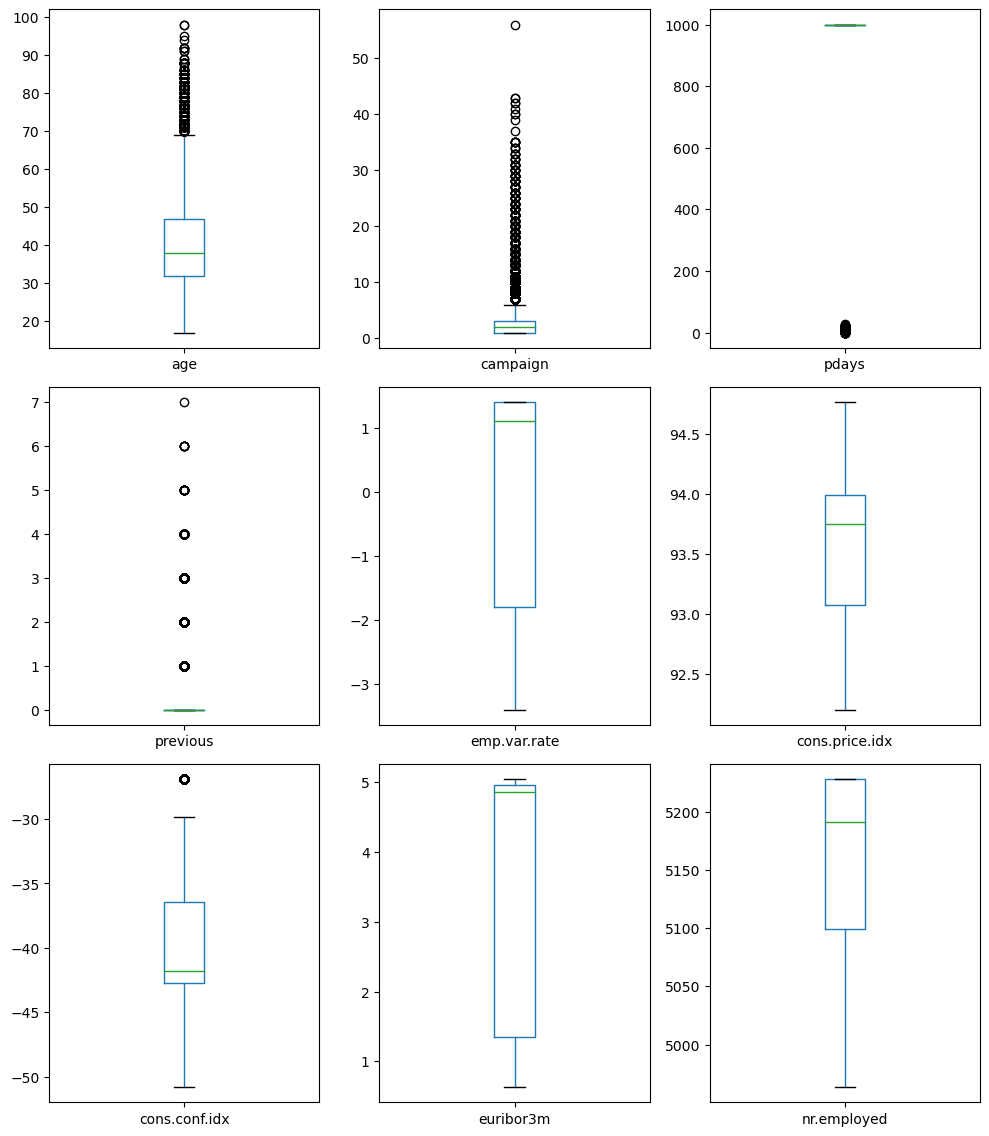

In [13]:
#outlier detection

import matplotlib.pyplot as plt

cols = ['age', 'campaign', 'pdays',
       'previous', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed']

       
plt.figure(figsize=(10,15))

for i, col in enumerate(cols):
    plt.subplot(4,3,i+1)
    df.boxplot(col)
    plt.grid()
    plt.tight_layout()

In [14]:
#checking statistics of outlier features

df[['age', 'pdays', 'campaign', 'previous']].describe()

,age,pdays,campaign,previous
count,41176.00000,41176.000000,41176.000000,41176.000000
mean,40.02380,962.464810,2.567879,0.173013
std,10.42068,186.937102,2.770318,0.494964
min,17.00000,0.000000,1.000000,0.000000
25%,32.00000,999.000000,1.000000,0.000000
50%,38.00000,999.000000,2.000000,0.000000
75%,47.00000,999.000000,3.000000,0.000000
max,98.00000,999.000000,56.000000,7.000000


In [15]:
len(df[df['pdays'] == 999]) / len(df) * 100

96.32067223625413

In [16]:
len(df[df['campaign'] > 20])  / len(df) * 100

0.38129007188653585

In [17]:
len(df[df['campaign'] > 7])

1777

# Imputation using median

From df.describe(), the median is the 50% value, which is 2 

In [18]:
#The value which is outside the whisker
print(df['campaign'].quantile(0.95))

7.0


In [19]:
#replacing the values which are greater than the 95th percentile
import numpy as np
df['campaign1'] = np.where(df['campaign'] > 7, 2, df['campaign'])
df[['campaign', 'campaign1']].describe()

,campaign,campaign1
count,41176.000000,41176.000000
mean,2.567879,2.118127
std,2.770318,1.383215
min,1.000000,1.000000
25%,1.000000,1.000000
50%,2.000000,2.000000
75%,3.000000,3.000000
max,56.000000,7.000000


After median imputation, the maximum value has now become 7

# Imputation using mean

From df.describe(), the mean is 2.56

In [20]:
#replacing the values which are greater than the 95th percentile
df['campaign2'] = np.where(df['campaign'] > 7, 2.56, df['campaign'])
df[['campaign', 'campaign1','campaign2']].describe()

,campaign,campaign1,campaign2
count,41176.000000,41176.000000,41176.000000
mean,2.567879,2.118127,2.142295
std,2.770318,1.383215,1.385829
min,1.000000,1.000000,1.000000
25%,1.000000,1.000000,1.000000
50%,2.000000,2.000000,2.000000
75%,3.000000,3.000000,3.000000
max,56.000000,7.000000,7.000000


Statictics of the dataset after both median and mean imputation remains more or less the same 

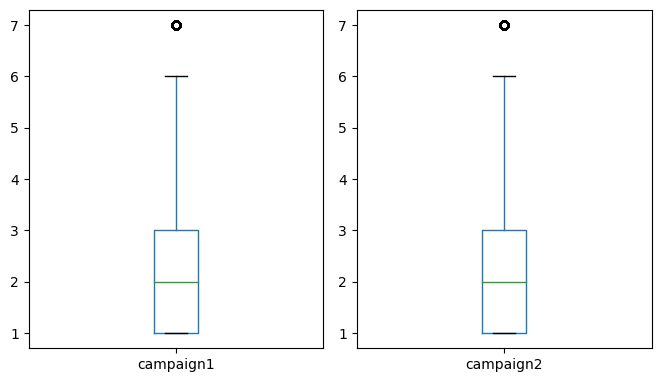

In [21]:
#outlier detection  after imputation
import matplotlib.pyplot as plt
cols = ['campaign1','campaign2']
plt.figure(figsize=(10,15))
for i, col in enumerate(cols):
    plt.subplot(4,3,i+1)
    df.boxplot(col)
    plt.grid()
    plt.tight_layout()

# EDA

## Feature distribution and relationship visualizations of categorical_variables

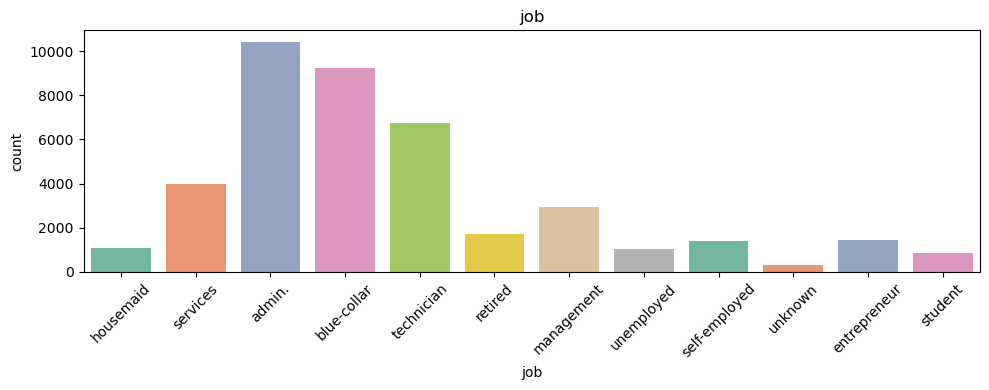

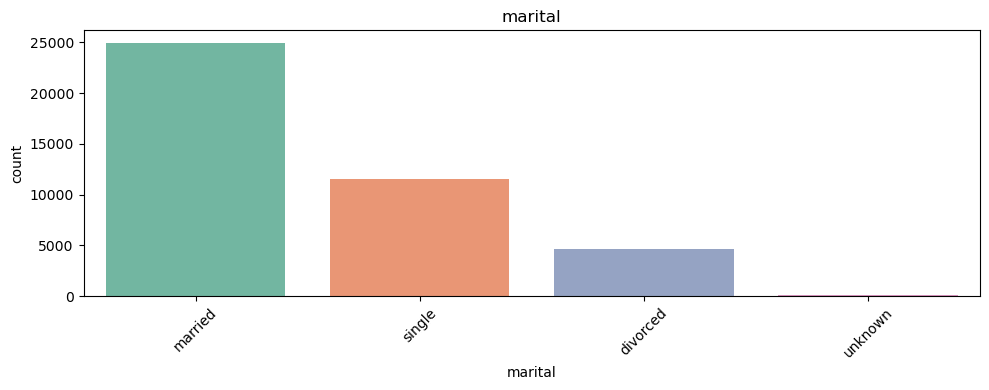

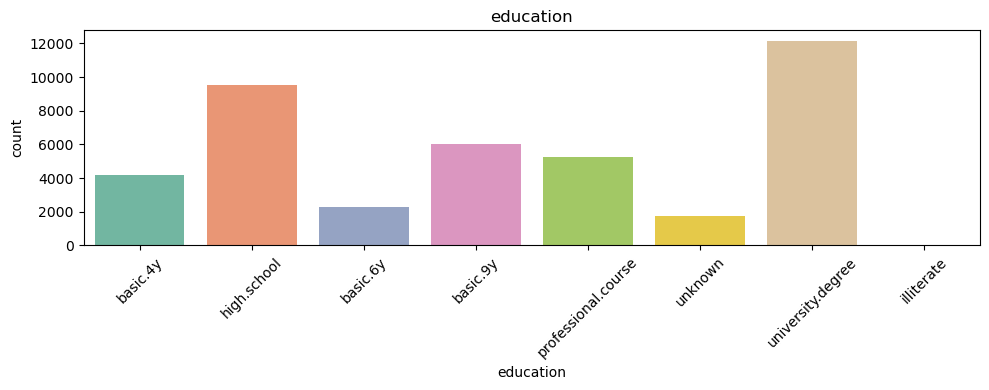

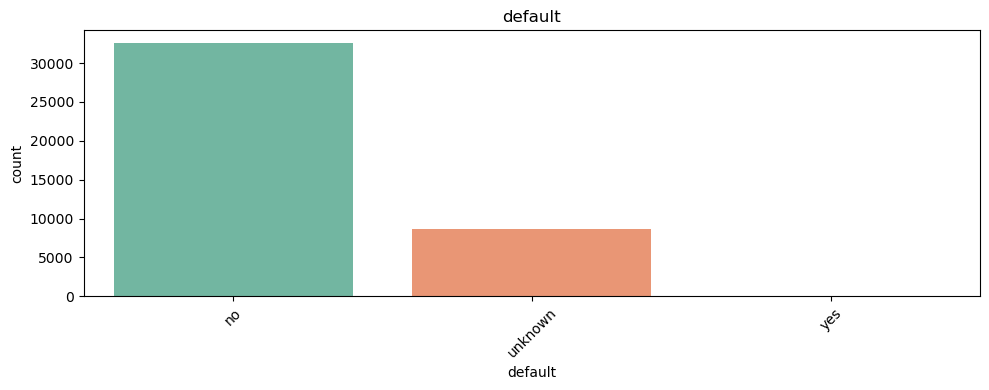

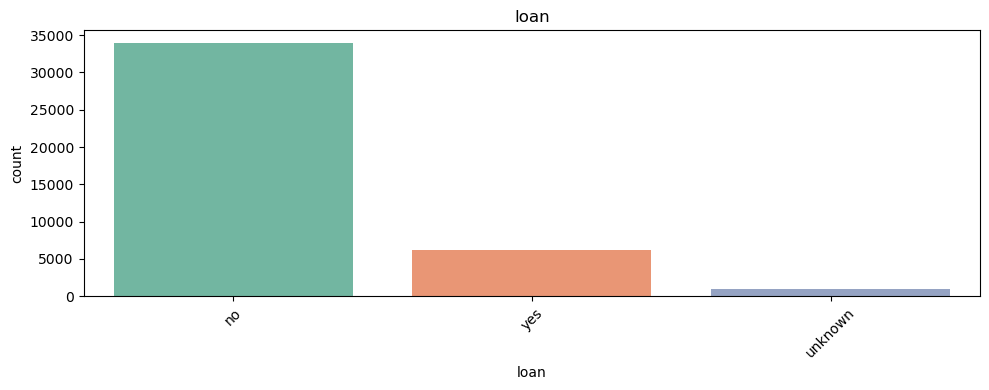

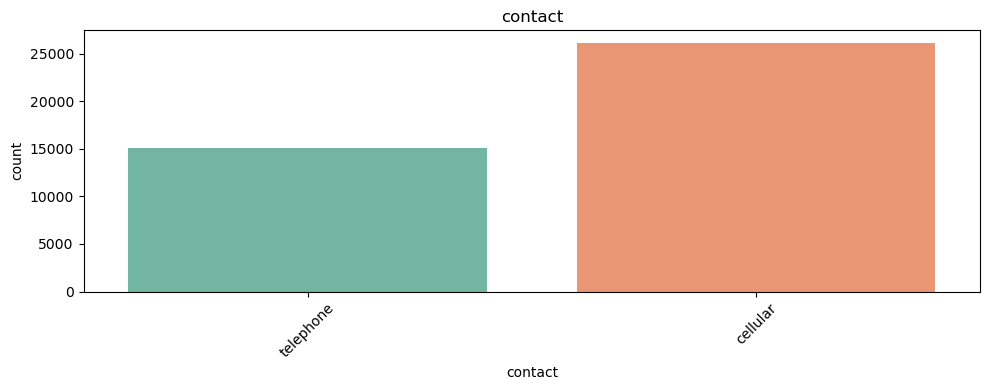

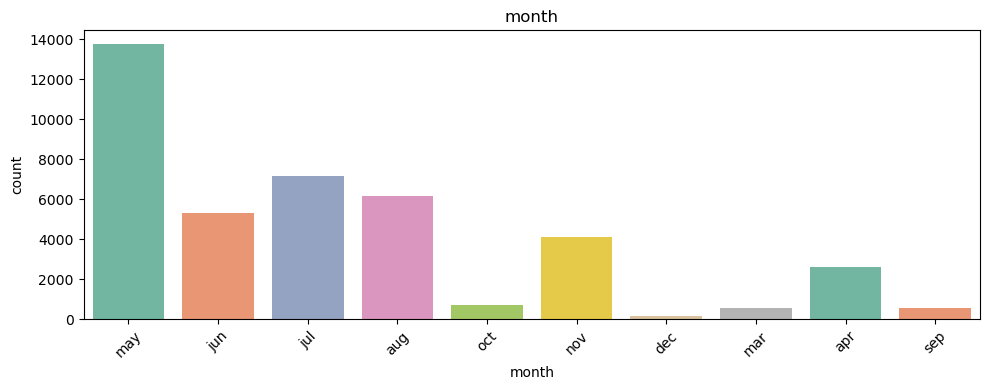

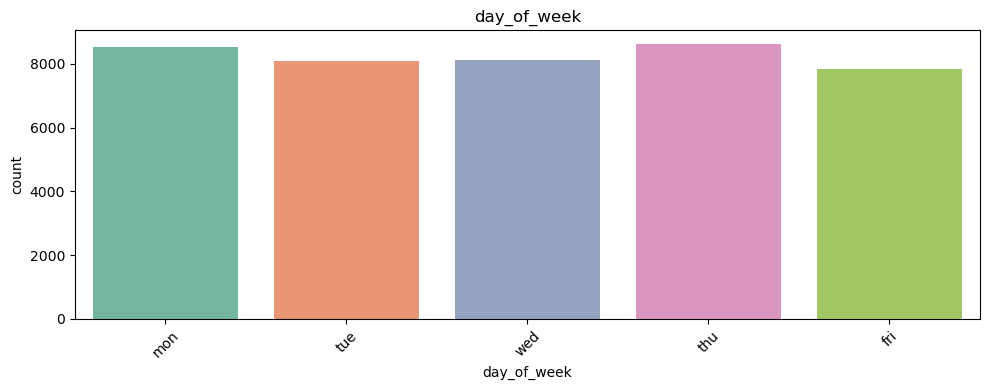

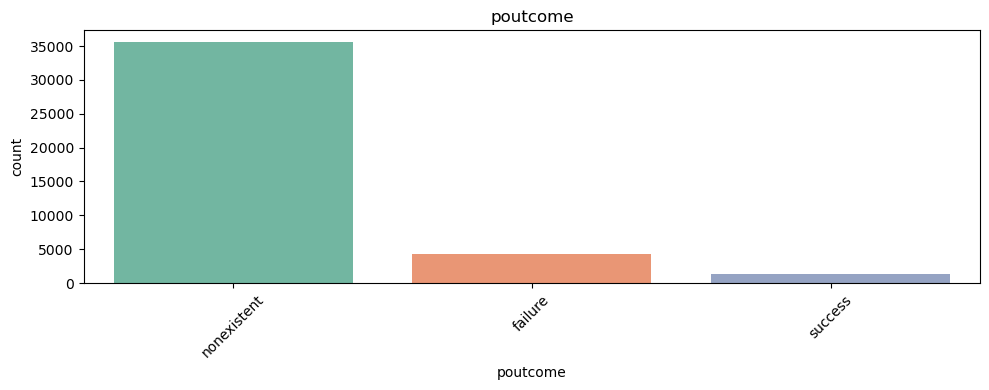

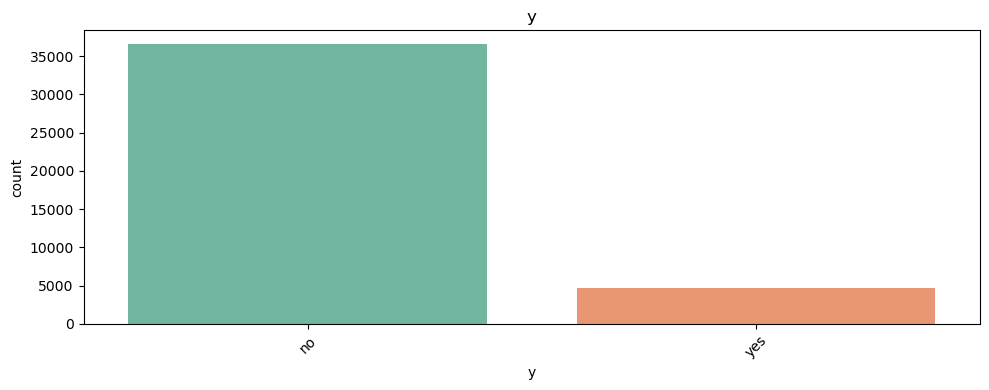

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

# Suppress warnings
warnings.filterwarnings("ignore")

# Define a custom color palette
custom_palette = sns.color_palette("Set2")

categorical_variables = ['job', 'marital', 'education', 'default', 'loan', 'contact', 'month', 'day_of_week', 'poutcome', 'y']

for col in categorical_variables:
    plt.figure(figsize=(10, 4))
    sns.countplot(data=df, x=col, palette=custom_palette)
    plt.title(col)
    plt.xticks(rotation=45)
    plt.tight_layout()

plt.show()


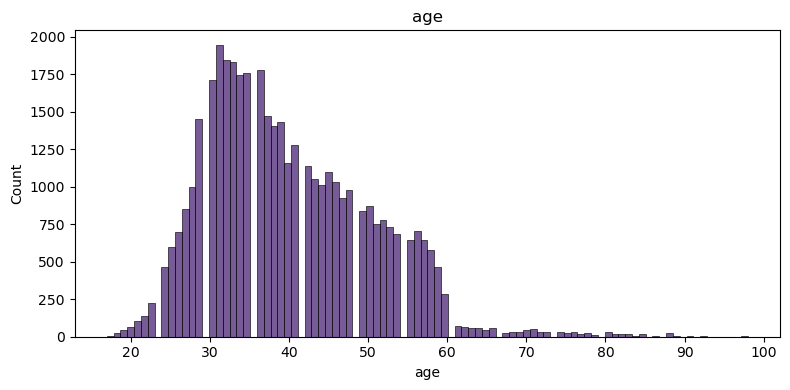

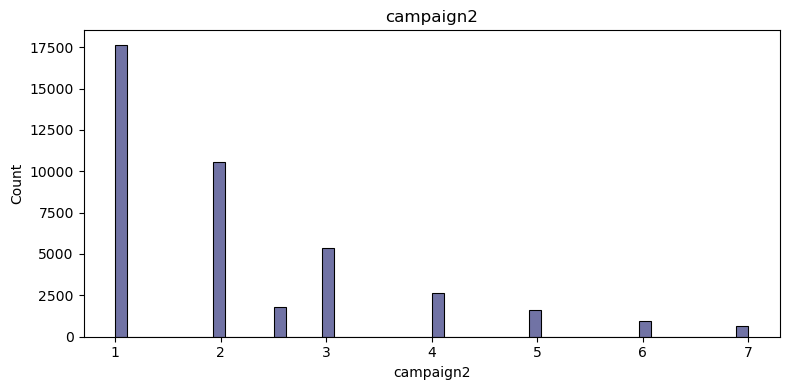

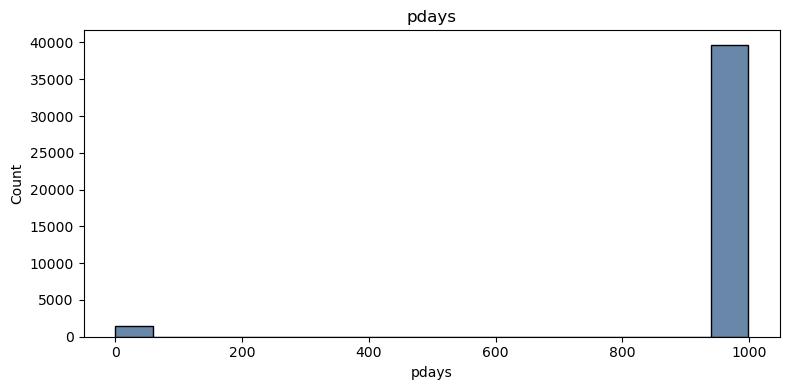

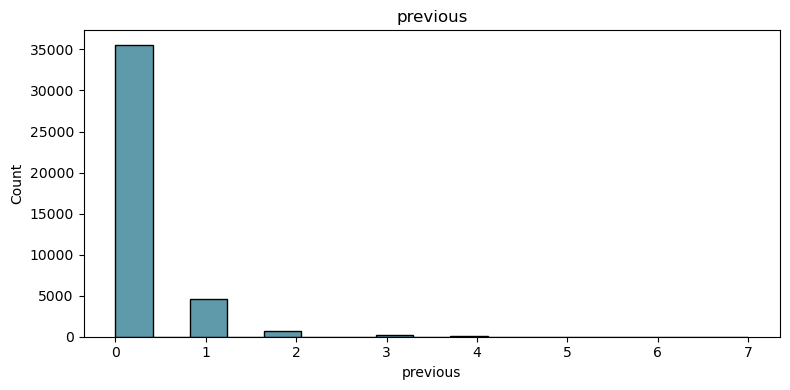

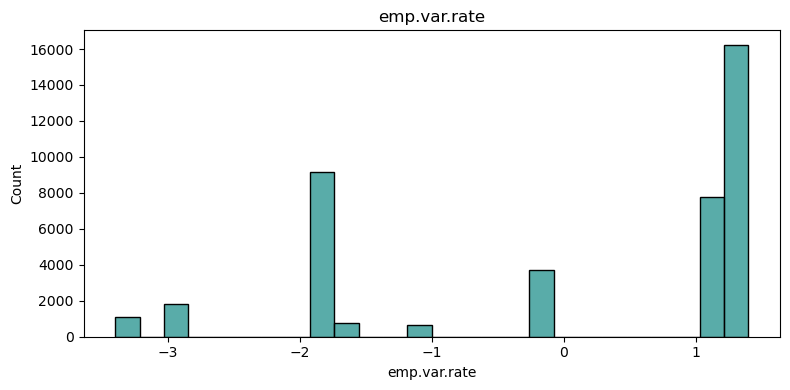

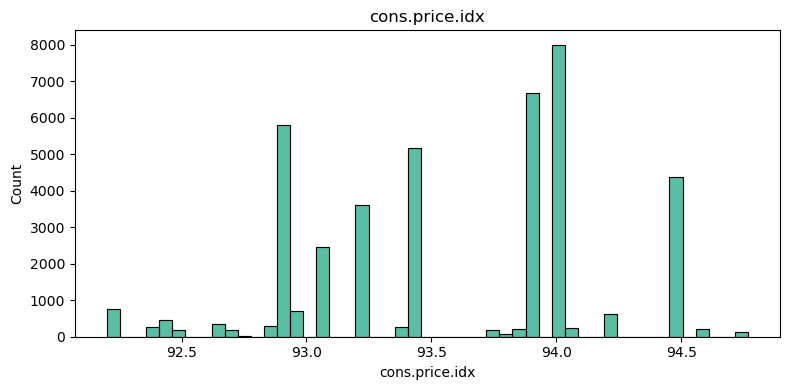

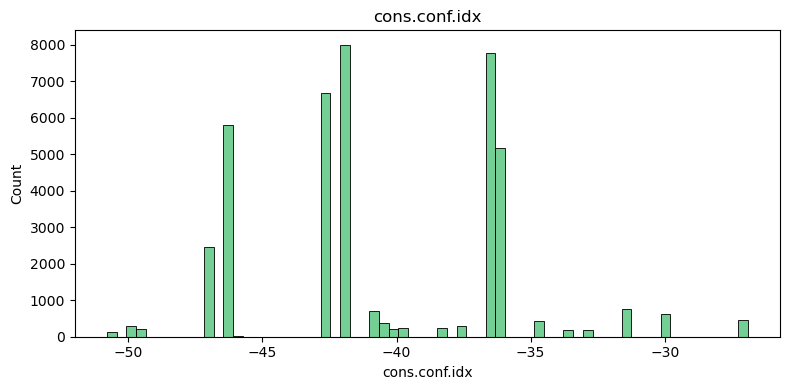

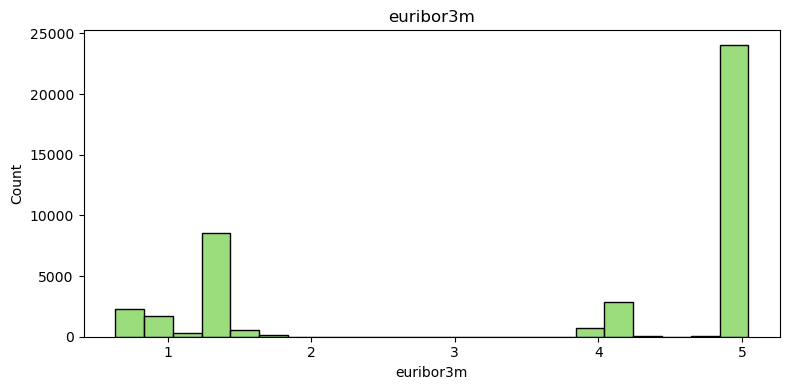

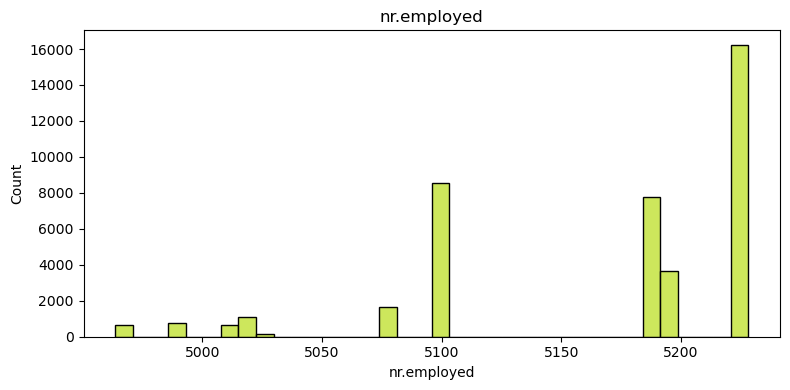

In [23]:


numerical_variables = ['age', 'campaign2', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']

# Define a color map or a list of colors for bars
colors = sns.color_palette("viridis", len(numerical_variables))  # You can choose a different color palette

for col, color in zip(numerical_variables, colors):
    plt.figure(figsize=(8, 4))
    sns.histplot(df[col], kde=False, color=color)
    plt.title(col)
    plt.tight_layout()
    plt.show()


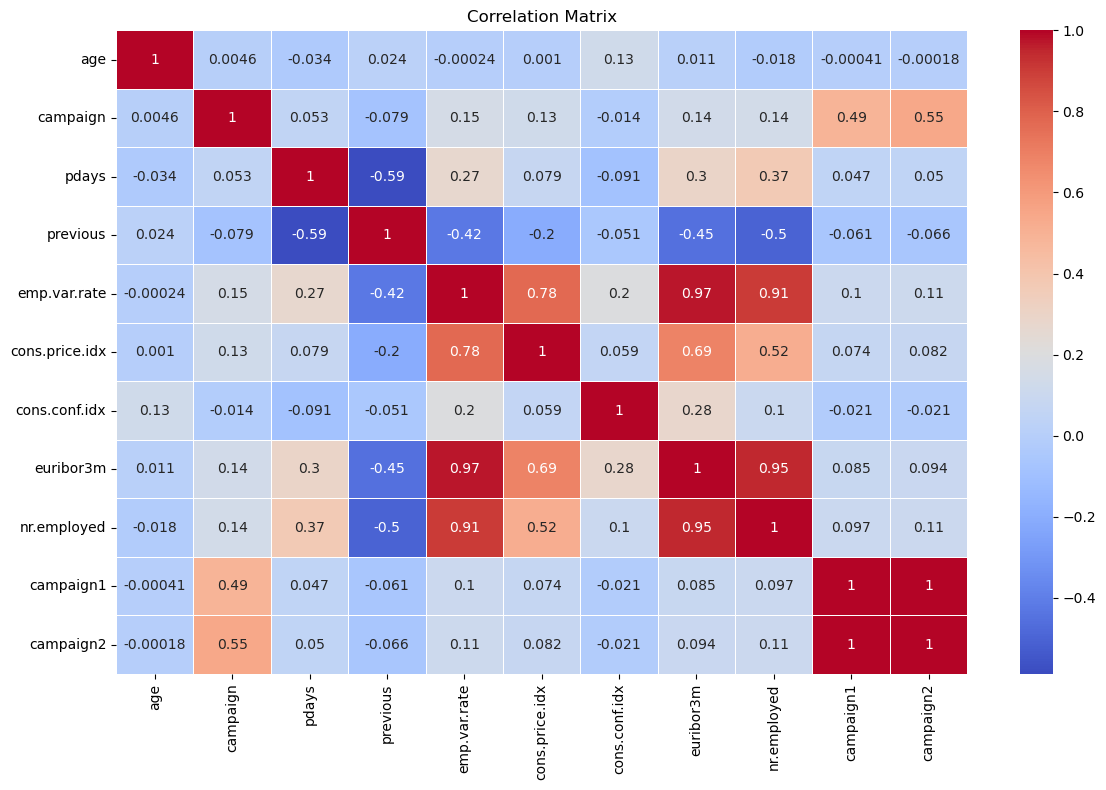

In [24]:
# correlation matrix
# Filter numeric columns
numeric_columns = df.select_dtypes(include=['int64', 'float64'])

# Calculate the correlation matrix for numeric columns
correlation_matrix = numeric_columns.corr()

# Set up the matplotlib figure
plt.figure(figsize=(12, 8))

# Create a heatmap of the correlation matrix
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)

# Customize the heatmap appearance
plt.title('Correlation Matrix')
plt.tight_layout()

# Display the heatmap
plt.show()



  age_group  count
0     17-25   1665
1     26-40  22096
2     41-60  16506
3       60+    909


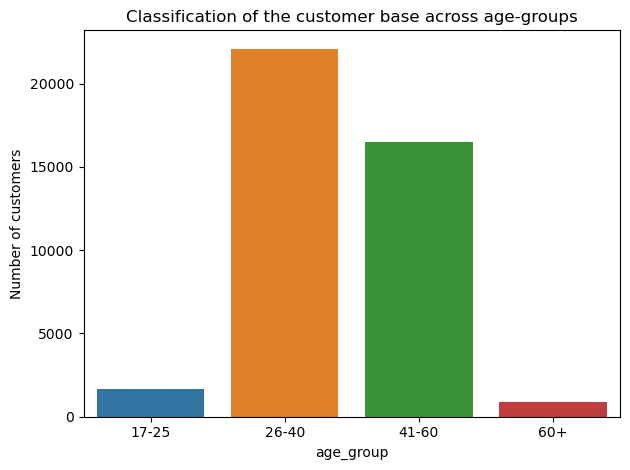

In [25]:
# Adding new age-group column to bank-additional-full data
# min = 17, max = 98 yrs
# 17-25, 26-40, 41-60, 60+ yrs
groups = df['age'].apply(lambda x: '17-25' if x<=25 else ('26-40' if x<=40 else ('41-60' if x<=60 else '60+')))
df['age_group'] = groups

age_group_counts = pd.DataFrame(df.groupby('age_group').age.count()).rename({'age':'count'}, axis = 1).reset_index()
print(age_group_counts)

sns.barplot(x = 'age_group', y = 'count', data = age_group_counts)
plt.title('Classification of the customer base across age-groups')
plt.ylabel('Number of customers')
plt.tight_layout()
plt.show()

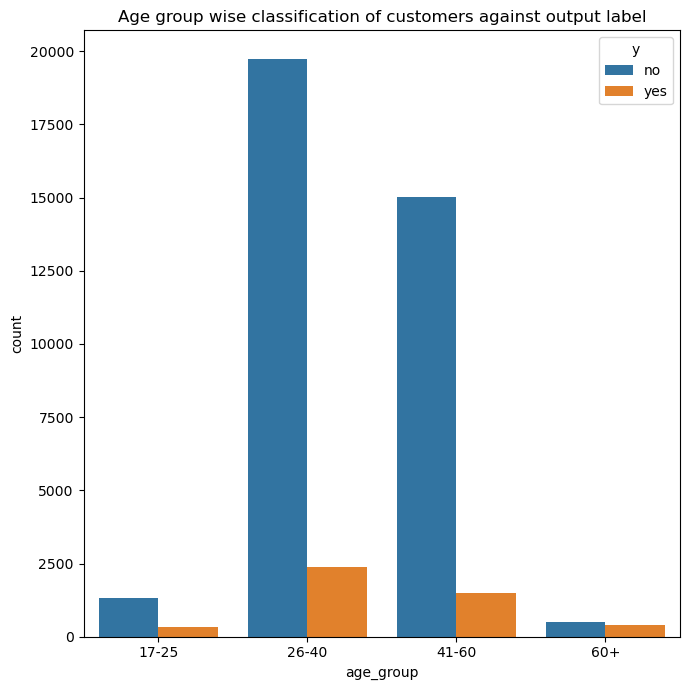

In [26]:
# Looking at relation between different age groups and the output label y

agegroup_y = pd.DataFrame(df.groupby('age_group').y.value_counts()).rename({'y':'count'}, axis = 1).reset_index()

plt.figure(figsize = (7,7))
plt.title('Age group wise classification of customers against output label')
sns.barplot(x = 'age_group', y = 'count', hue = 'y', data = agegroup_y)
plt.tight_layout()
plt.show()

In the age-groups of 26-40 and 41-60 yrs, majority of the people are not subscribed to the term deposit plan

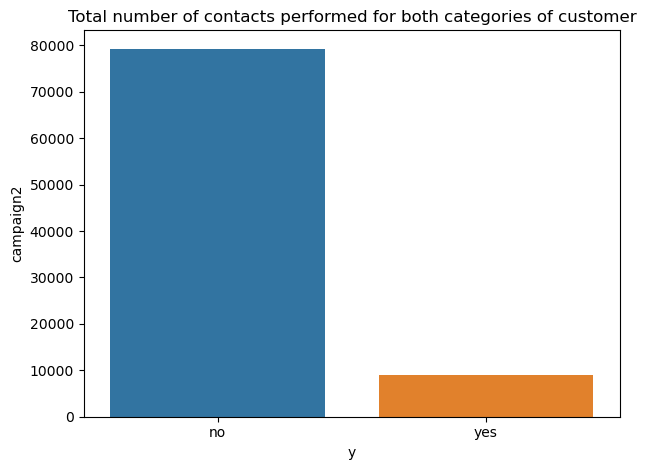

In [27]:
# Looking at relation between Number of contacts made to the customer (campaign) and the output label y

camp = pd.DataFrame(df.groupby('y')['campaign2'].sum()).reset_index()
plt.title('Total number of contacts performed for both categories of customer')
sns.barplot(x = 'y', y = 'campaign2', data = camp)
plt.tight_layout()
plt.show()

When more number of contacts is made to the customer, they haven't subscribed to the term deposit plan 

age_group
17-25     3568.52
26-40    47185.00
41-60    35779.76
60+       1677.84
Name: campaign2, dtype: float64


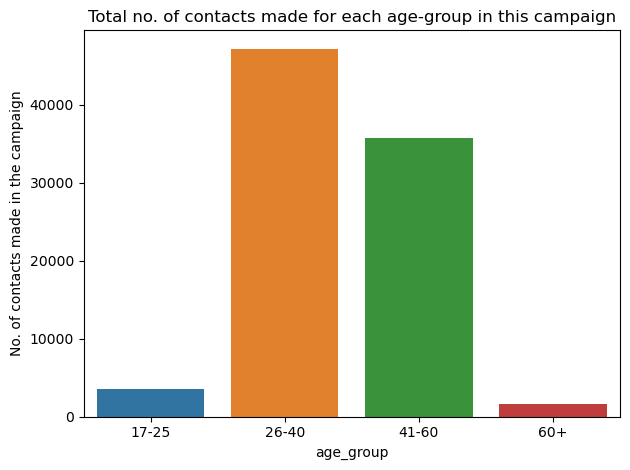

In [28]:
# Looking at relation between 'age_group' and 'campaign' that is number of contacts performed for each age group

ag_camp = df.groupby('age_group').campaign2.sum()
print(ag_camp)

plt.title('Total no. of contacts made for each age-group in this campaign')
sns.barplot(x=ag_camp.index, y=ag_camp.values)
plt.ylabel('No. of contacts made in the campaign')
plt.tight_layout()
plt.show()

The 26-40 and 41-60 age-groups witness majority of the contacts made in this campaign. These two age-groups seem to the target groups for the bank.

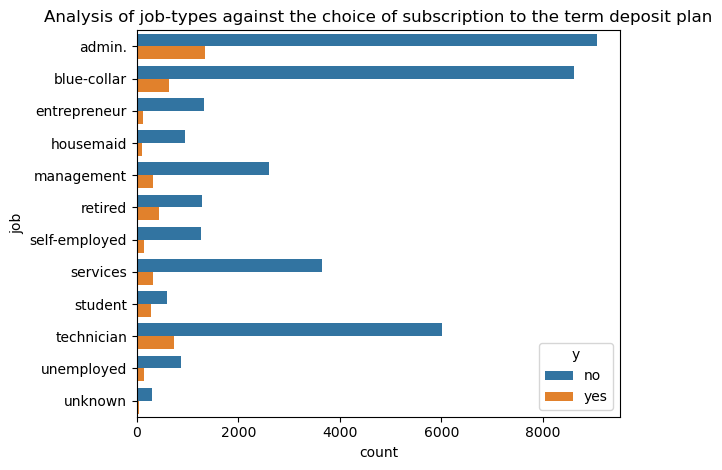

In [29]:
# Looking at relation between job and the output label y

joby = pd.DataFrame(df.groupby('job').y.value_counts()).rename({'y':'count'}, axis = 1).reset_index()
plt.title('Analysis of job-types against the choice of subscription to the term deposit plan')
sns.barplot(x = 'count', y = 'job', hue = 'y', data = joby)
plt.tight_layout()
plt.show()

Looking at the jobs, 'admin', 'blue-collar' and 'technician' are the prominent jobs and most of the customers in these jobs have rejected the term deposit plan.

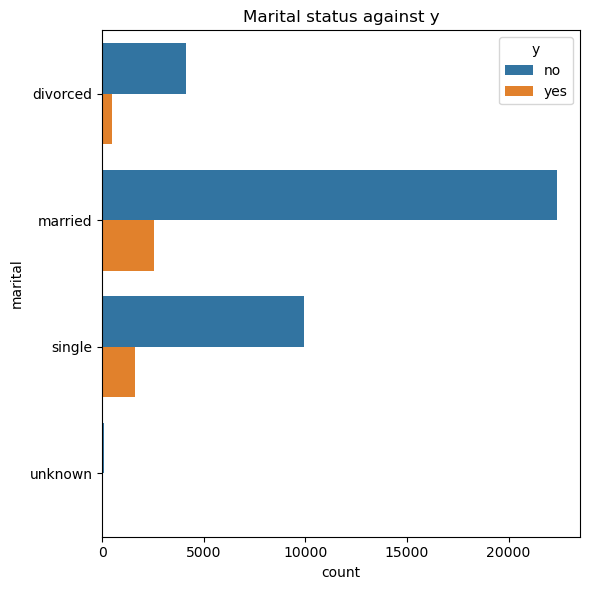

In [30]:
# Analysing marital status and the output label

marital = pd.DataFrame(df.groupby('marital').y.value_counts()).rename({'y':'count'}, axis = 1).reset_index()

# marital status vs y
plt.figure(figsize = (6,6))
plt.title('Marital status against y')
sns.barplot(x = 'count', y = 'marital', hue = 'y', data = marital)
plt.tight_layout()
plt.show()

married and single customers are the majority of the customer base and comparatively married customers have taken the term deposit

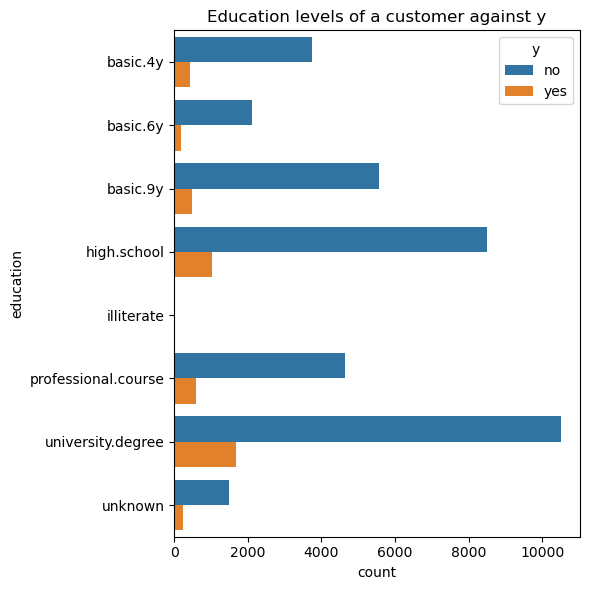

In [31]:
# Analysing the different education levels of a customer against the choice of subscription

edu = pd.DataFrame(df.groupby('education').y.value_counts()).rename({'y':'count'}, axis = 1).reset_index()

plt.figure(figsize = (6,6))
plt.title('Education levels of a customer against y')
sns.barplot(x = 'count', y = 'education', hue = 'y', data = edu)
plt.tight_layout()
plt.show()

Customers with university degree have subscribed to the term deposit more

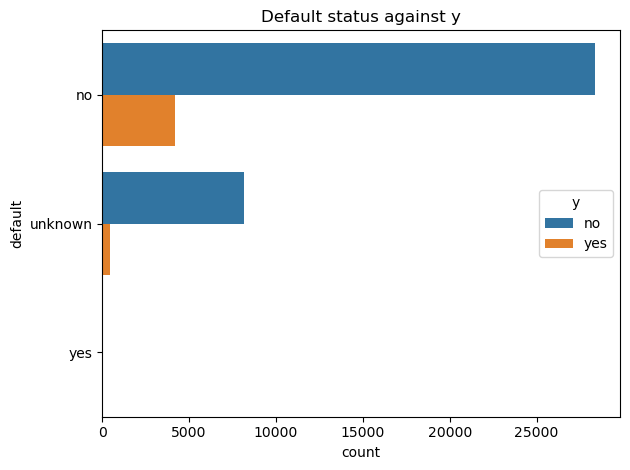

In [32]:
# Analysing the default status against the choice of subscription
default = pd.DataFrame(df.groupby('default').y.value_counts()).rename({'y':'count'}, axis = 1).reset_index()

plt.title('Default status against y')
sns.barplot(x = 'count', y = 'default', hue = 'y', data = default)
plt.tight_layout()
plt.show()

# There is no data for customers who have a default.

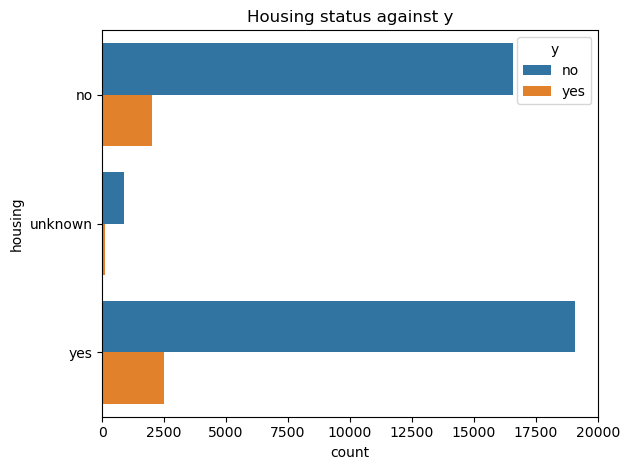

In [33]:
# Analysing housing status and y
housing = pd.DataFrame(df.groupby('housing').y.value_counts()).rename({'y':'count'}, axis = 1).reset_index()

plt.title('Housing status against y')
sns.barplot(x = 'count', y = 'housing', hue = 'y', data = housing)
plt.tight_layout()
plt.show()

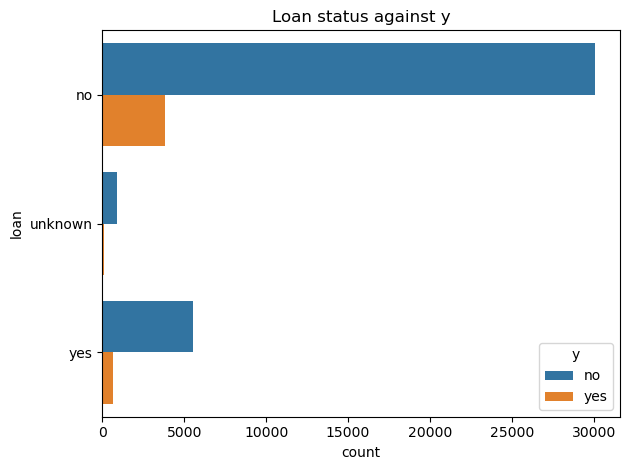

In [34]:
# analysing loan status and y
loan = pd.DataFrame(df.groupby('loan').y.value_counts()).rename({'y':'count'}, axis = 1).reset_index()

plt.title('Loan status against y')
sns.barplot(x = 'count', y = 'loan', hue = 'y', data = loan)
plt.tight_layout()
plt.show()

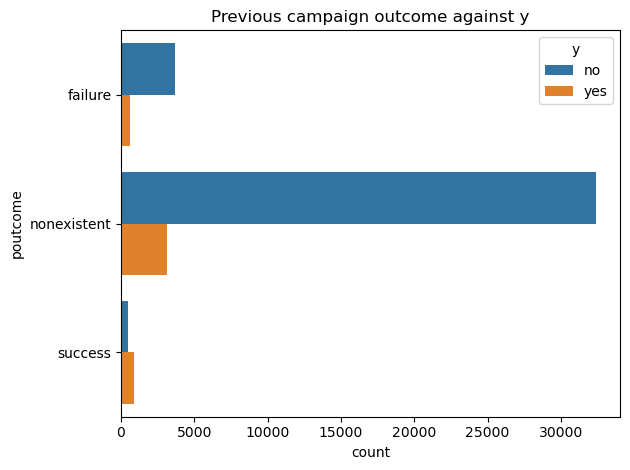

In [35]:
# analysing poutcome and y

poutcome = pd.DataFrame(df.groupby('poutcome').y.value_counts()).rename({'y':'count'}, axis = 1).reset_index()

plt.title('Previous campaign outcome against y')
sns.barplot(x = 'count', y = 'poutcome', hue = 'y', data = poutcome)
plt.tight_layout()
plt.show()    

Encoding all features before performing modelling

In [36]:
df.columns


Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'campaign', 'pdays', 'previous',
       'poutcome', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx',
       'euribor3m', 'nr.employed', 'y', 'campaign1', 'campaign2', 'age_group'],
      dtype='object')

In [37]:
clean_df = df.copy()
clean_df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,campaign1,campaign2,age_group
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,1,1.0,41-60
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,1,1.0,41-60
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,1,1.0,26-40
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,1,1.0,26-40
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,1,1.0,41-60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes,1,1.0,60+
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no,1,1.0,41-60
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no,2,2.0,41-60
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes,1,1.0,41-60


In [38]:
#dropping campaign and campaign1
clean_df.drop('campaign', axis = 1, inplace = True)
clean_df.drop('campaign1', axis = 1, inplace = True)

In [39]:
# Convert categorical columns to dummy variables
cat_columns = ['job', 'marital', 'education', 'contact', 'poutcome']
for col in cat_columns:
    clean_df = pd.concat([clean_df.drop(col, axis=1),
                         pd.get_dummies(clean_df[col], prefix=col, prefix_sep='_',
                                        drop_first=True, dummy_na=False)], axis=1)

In [40]:
# Encoding month and day of week
clean_df['month'].replace({'may': 5, 'jul': 7, 'aug': 8, 'jun': 6, 'nov': 11, 'apr': 4, 'oct': 10, 'sep': 9, 'mar': 3, 'dec': 12}, inplace=True)
clean_df['day_of_week'].replace({'thu': 5, 'mon': 2, 'wed': 4, 'tue': 3, 'fri': 6}, inplace=True)

In [41]:
# Encoding default, housing, loan, and y
clean_df['default'].replace({'yes': 1, 'no': 0, 'unknown': -1}, inplace=True)
clean_df['housing'].replace({'yes': 1, 'no': 0, 'unknown': -1}, inplace=True)
clean_df['loan'].replace({'yes': 1, 'no': 0, 'unknown': -1}, inplace=True)
clean_df['y'].replace({'yes': 1, 'no': 0}, inplace=True)

In [42]:
clean_df


,age,default,housing,loan,month,day_of_week,pdays,previous,emp.var.rate,cons.price.idx,...,education_basic.6y,education_basic.9y,education_high.school,education_illiterate,education_professional.course,education_university.degree,education_unknown,contact_telephone,poutcome_nonexistent,poutcome_success
0,56,0,0,0,5,2,999,0,1.1,93.994,...,0,0,0,0,0,0,0,1,1,0
1,57,-1,0,0,5,2,999,0,1.1,93.994,...,0,0,1,0,0,0,0,1,1,0
2,37,0,1,0,5,2,999,0,1.1,93.994,...,0,0,1,0,0,0,0,1,1,0
3,40,0,0,0,5,2,999,0,1.1,93.994,...,1,0,0,0,0,0,0,1,1,0
4,56,0,0,1,5,2,999,0,1.1,93.994,...,0,0,1,0,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,0,1,0,11,6,999,0,-1.1,94.767,...,0,0,0,0,1,0,0,0,1,0
41184,46,0,0,0,11,6,999,0,-1.1,94.767,...,0,0,0,0,1,0,0,0,1,0
41185,56,0,1,0,11,6,999,0,-1.1,94.767,...,0,0,0,0,0,1,0,0,1,0
41186,44,0,0,0,11,6,999,0,-1.1,94.767,...,0,0,0,0,1,0,0,0,1,0


In [43]:
import pandas as pd

# Assuming 'clean_df' is your DataFrame with both numerical and categorical columns

# Identify categorical columns
categorical_cols = clean_df.select_dtypes(include=['object']).columns

# Apply one-hot encoding to categorical columns
clean_df_encoded = pd.get_dummies(clean_df, columns=categorical_cols, drop_first=True)

# Display the resulting DataFrame
print(clean_df_encoded.head())


   age  default  housing  loan  month  day_of_week  pdays  previous  \
0   56        0        0     0      5            2    999         0   
1   57       -1        0     0      5            2    999         0   
2   37        0        1     0      5            2    999         0   
3   40        0        0     0      5            2    999         0   
4   56        0        0     1      5            2    999         0   

   emp.var.rate  cons.price.idx  ...  education_illiterate  \
0           1.1          93.994  ...                     0   
1           1.1          93.994  ...                     0   
2           1.1          93.994  ...                     0   
3           1.1          93.994  ...                     0   
4           1.1          93.994  ...                     0   

   education_professional.course  education_university.degree  \
0                              0                            0   
1                              0                            0   
2    

# Modelling using Machine Learning

In [44]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import pandas as pd

# Assuming 'clean_df' is your DataFrame with both numerical and categorical columns

# Identify categorical columns
categorical_cols = clean_df.select_dtypes(include=['object']).columns

# Apply one-hot encoding to categorical columns
clean_df = pd.get_dummies(clean_df, columns=categorical_cols, drop_first=True)

# Separate features (X) and target variable (y)
X = clean_df.drop(['y'], axis=1)
y = clean_df['y']

# Train and test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize the dataset
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

#creating the objects for the models 
#1. Logistic Regression
logreg = LogisticRegression()

#2. Decision Tree
dt=DecisionTreeClassifier()

#3 Naive Bayes
nb=BernoulliNB()

#4. Random Forest
rf=RandomForestClassifier()

#5. Gradient Boosting
gb=GradientBoostingClassifier()

cv_dict = {0: 'Logistic Regression', 1: 'Decision Tree', 2: 'Naive Bayes', 3: 'Random Forest', 4: 'Gradient Boosting'}
cv_models=[logreg,dt,nb,rf,gb]


for i,model in enumerate(cv_models):
    print("{} Test Accuracy: {}".format(cv_dict[i],cross_val_score(model, X, y, cv=10, scoring ='accuracy').mean()*100))

Logistic Regression Test Accuracy: 84.21343679407445
Decision Tree Test Accuracy: 27.976168890926324
Naive Bayes Test Accuracy: 82.08545797917
Random Forest Test Accuracy: 47.17779889660174
Gradient Boosting Test Accuracy: 53.42138278567068


In [45]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Assuming 'X' and 'y' are your features and target variable
# Standardize the dataset
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# Define the reduced hyperparameter grid to search
param_grid_lr = {
    'C': np.logspace(-3, 3, 20),
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'saga'],
    'max_iter': [80, 100, 120]
}

# Create a Logistic Regression model
logreg = LogisticRegression(random_state=0)

# Use GridSearchCV to find the best hyperparameters
clf_lr = GridSearchCV(logreg, param_grid_lr, cv=5, verbose=0, n_jobs=-1)
best_model_lr = clf_lr.fit(X_train, y_train)

# Print the best hyperparameters
print("Best Hyperparameters for Logistic Regression:", best_model_lr.best_params_)

# Access the best model
best_logreg_model = best_model_lr.best_estimator_

# Evaluate the best model on the test set
test_accuracy_lr = best_logreg_model.score(X_test, y_test)
print("Test Accuracy for Logistic Regression:", test_accuracy_lr)


Best Hyperparameters for Logistic Regression: {'C': 0.1623776739188721, 'max_iter': 80, 'penalty': 'l1', 'solver': 'liblinear'}
Test Accuracy for Logistic Regression: 0.8965433497935724


# Logistic Regression has perfomed the best out of all the classifiers
# Performing hyperparameter tuning for Logistic regression

In [46]:

# Create a Logistic Regression model with the best hyperparameters
best_logreg_model = LogisticRegression(C=0.1623776739188721, max_iter=80, penalty='l1', solver='liblinear', random_state=0)

# Train the model on the training set
best_logreg_model.fit(X_train, y_train)

# Predict the target variable on the test set
y_pred = best_logreg_model.predict(X_test)

# Evaluate the model performance
test_accuracy = best_logreg_model.score(X_test, y_test)
print("Test Accuracy for Logistic Regression:", test_accuracy)


Test Accuracy for Logistic Regression: 0.8965433497935724


In [47]:
from sklearn.metrics import confusion_matrix, classification_report

confusion_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n",confusion_matrix)
print("Classification Report:\n",classification_report(y_test, y_pred))

Confusion Matrix:
 [[10788   141]
 [ 1137   287]]
Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.99      0.94     10929
           1       0.67      0.20      0.31      1424

    accuracy                           0.90     12353
   macro avg       0.79      0.59      0.63     12353
weighted avg       0.88      0.90      0.87     12353



# Confusion matrix results tell us that we have 10783 + 146 Correct predictions and 1136+288 incorrect

# Classification report shows precision as 90% which is the ability of a classification model to identify only the relevant data points 

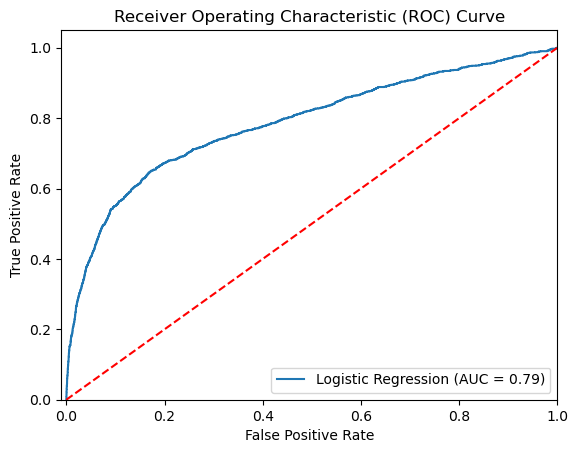

In [53]:
from sklearn.preprocessing import StandardScaler

# Assuming X_test is your original test data
# You should use the same scaler that was used for scaling the training data

# Create a StandardScaler object
scaler = StandardScaler()

# Fit and transform the scaler on the training data
X_train_scaled = scaler.fit_transform(X_train)

# Use the same scaler to transform the test data
X_test_scaled = scaler.transform(X_test)
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Assuming you have a trained model (e.g., best_logreg_model) and X_test_scaled
# Make sure X_test_scaled is defined and contains the scaled test data

# Make predictions on the test set
y_scores = best_logreg_model.decision_function(X_test_scaled)

logit_roc_auc = roc_auc_score(y_test, y_scores)
fpr, tpr, thresholds = roc_curve(y_test, y_scores)

# Plotting the ROC curve
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (AUC = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1], 'r--')
plt.xlim([-0.01, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()
